In [122]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv('C:\\Users\\91735\\Downloads\\Advertising.csv')

In [124]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# 1. Explain the dataset

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


From the above information we get that there are 200 rows and 5 columns

   The columns are TV,radio,newspaper,sales and one unnamed column represents serial number
    
   Non of the columns have null values
    
     


In [126]:
data.duplicated().sum()

0

There is no duplicates in our dataset

# Compare all the 3 advertising mode with the sales

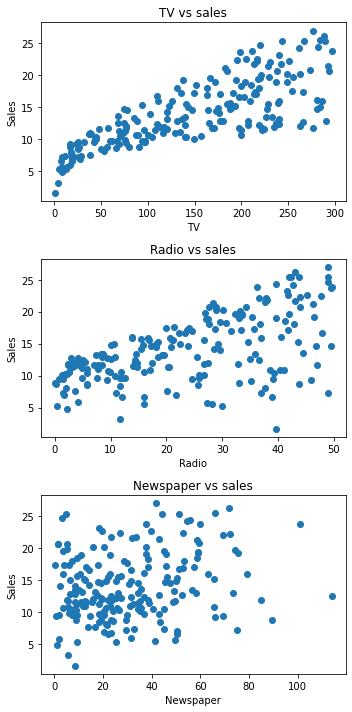

In [127]:
fig, axs = plt.subplots(3,figsize=(5,10))
axs[0].scatter(data=data,x='TV',y='Sales')
axs[0].set_title('TV vs sales')
axs[0].set_xlabel('TV')
axs[0].set_ylabel('Sales')
axs[1].scatter(data=data,x='Radio',y='Sales')
axs[1].set_title('Radio vs sales')
axs[1].set_xlabel('Radio')
axs[1].set_ylabel('Sales')
axs[2].scatter(data=data,x='Newspaper',y='Sales')
axs[2].set_title('Newspaper vs sales')
axs[2].set_xlabel('Newspaper')
axs[2].set_ylabel('Sales')
fig.tight_layout()
plt.show()

From the graph we can see a linear increase in the sales of TV

# 2. Check the summary statistics and discuss the max, min, avg, median, and percentiles.



In [128]:
data1=data.drop(['Unnamed: 0','Sales'],axis=1)
data1.describe()

,TV,Radio,Newspaper
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000
std,85.854236,14.846809,21.778621
min,0.700000,0.000000,0.300000
25%,74.375000,9.975000,12.750000
50%,149.750000,22.900000,25.750000
75%,218.825000,36.525000,45.100000
max,296.400000,49.600000,114.000000


a)max value

In [129]:
data1.max()

TV           296.4
Radio         49.6
Newspaper    114.0
dtype: float64

TV has the maximum value of 294.4 

b)min value

In [130]:
data1.min()

TV           0.7
Radio        0.0
Newspaper    0.3
dtype: float64

Radio contain minimum value of 0 ,which means advertising money spent on radio is zero for some cases

c)avg value

In [131]:
data1.mean()

TV           147.0425
Radio         23.2640
Newspaper     30.5540
dtype: float64

TV has the highest mean ,which means money spent on TV is high

d)median

In [132]:
data1.median() 

TV           149.75
Radio         22.90
Newspaper     25.75
dtype: float64

In [133]:
data1.quantile() ## this code can also be used for finding the median(which gives 50%)

TV           149.75
Radio         22.90
Newspaper     25.75
Name: 0.5, dtype: float64

e)percentile

In [134]:
data1.quantile([.25,.50,.75])

,TV,Radio,Newspaper
0.25,74.375,9.975,12.75
0.50,149.750,22.900,25.75
0.75,218.825,36.525,45.10


Summary:The maximum amount of money is spent on TV and the least on radio

# 3. The manager wants to find out whether the same amount was spent for for the three advertisements (TV , Radio and Newspaper). Comment on  your findings



For this question we use ANOVA test

 lets find the hypothesis
    
   H0:The amount spent on all the 3 advertisements are the same
   
   H1:The amount spent on the 3 advertisements are different
   
   Level of significance=0.05

In [135]:
fvalue ,pvalue=stats.f_oneway(data['TV'],data['Radio'],data['Newspaper'])
print('P Value=',pvalue ,'\nf value=',fvalue)

P Value= 4.552931539744962e-103 
f value= 358.8514595342597


In [136]:
if(fvalue<pvalue):
    print('We fail to reject our null hypothesis\nTherefore the amount spent on all the 3 advertisements are the same')
else:
    print('We reject our null hypothesis\nTherefore the amount spent on the 3 advertisements are different')

We reject our null hypothesis
Therefore the amount spent on the 3 advertisements are different
